<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [458]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [459]:
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [460]:
df = df.drop('Id', axis=1)

In [461]:
df.shape

(1460, 80)

In [462]:
df.isnull().sum().sum()

6965

In [463]:
for i, e in enumerate(df.isnull().sum()):
  print(i, e)

0 0
1 0
2 259
3 0
4 0
5 1369
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 8
25 8
26 0
27 0
28 0
29 37
30 37
31 38
32 37
33 0
34 38
35 0
36 0
37 0
38 0
39 0
40 0
41 1
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 690
57 81
58 81
59 81
60 0
61 0
62 81
63 81
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 1453
72 1179
73 1406
74 0
75 0
76 0
77 0
78 0
79 0


In [464]:
types = []
for type_ in df.dtypes:
  types.append(type_)

In [465]:
types = pd.DataFrame(types)
types[0].value_counts()

object     43
int64      34
float64     3
Name: 0, dtype: int64

In [466]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [467]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [468]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [469]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [470]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [471]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [472]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [473]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [474]:
for i in range(df.shape[1]):
  print(f'{df.columns[i]}: {df.dtypes[i]}\n{"-"*60}')

MSSubClass: int64
------------------------------------------------------------
MSZoning: object
------------------------------------------------------------
LotFrontage: float64
------------------------------------------------------------
LotArea: int64
------------------------------------------------------------
Street: object
------------------------------------------------------------
Alley: object
------------------------------------------------------------
LotShape: object
------------------------------------------------------------
LandContour: object
------------------------------------------------------------
Utilities: object
------------------------------------------------------------
LotConfig: object
------------------------------------------------------------
LandSlope: object
------------------------------------------------------------
Neighborhood: object
------------------------------------------------------------
Condition1: object
-------------------------------------

In [475]:
obj_vals = []

In [476]:
for i in range(df.shape[1]):
  if df.dtypes[i] == object:
    obj_vals.append(df.columns[i])

In [477]:
len(obj_vals)

43

In [478]:
for idx in range(len(obj_vals)):
  print(f'{obj_vals[idx]}: {df[obj_vals[idx]].nunique()}')

MSZoning: 5
Street: 2
Alley: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 4
BsmtCond: 4
BsmtExposure: 4
BsmtFinType1: 6
BsmtFinType2: 6
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Functional: 7
FireplaceQu: 5
GarageType: 6
GarageFinish: 3
GarageQual: 5
GarageCond: 5
PavedDrive: 3
PoolQC: 3
Fence: 4
MiscFeature: 4
SaleType: 9
SaleCondition: 6


In [479]:
meds = df.mean()

In [480]:
df = df.fillna(meds)

In [481]:
df.isnull().sum().sum()

6617

In [482]:
df = df.drop('Alley', axis=1)
df.isnull().sum().sum()

5248

In [483]:
# 71 1453
# 72 1179
# 73 1406

In [484]:
df.columns[71]

'Fence'

In [485]:
df.columns[72]

'MiscFeature'

In [486]:
df.columns[73]

'MiscVal'

In [487]:
df = df.drop(['Fence', 'MiscFeature', 'MiscVal'], axis=1)

In [488]:
df.isnull().sum().sum()

2663

In [489]:
for i, e in enumerate(df.isnull().sum()):
  if e != 0:
    print(i, e)

23 8
28 37
29 37
30 38
31 37
33 38
40 1
55 690
56 81
58 81
61 81
62 81
70 1453


In [490]:
# 23 8
# 28 37
# 29 37
# 30 38
# 31 37
# 33 38
# 40 1
# 55 690
# 58 81
# 61 81
# 62 81
# 70 1453

In [491]:
df.columns[70]

'PoolQC'

In [492]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [493]:
df = df.drop('PoolQC', axis=1)

In [494]:
df['GarageType'].fillna('NoGarage', inplace=True)

In [495]:
df.columns[55]

'FireplaceQu'

In [496]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [497]:
df['FireplaceQu'].fillna('NoFP', inplace=True)

In [498]:
df.isnull().sum().sum()

439

In [499]:
df.columns[2]

'LotFrontage'

In [500]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [501]:
df.isnull().sum().sum()

439

In [502]:
df.shape

(1460, 75)

In [503]:
df = df.dropna()

In [504]:
df.shape

(1338, 75)

In [505]:
df.isnull().sum().sum()

0

In [506]:
from sklearn.preprocessing import LabelEncoder

In [507]:
# updating obj_values

obj_vals = []

for i in range(df.shape[1]):
  if df.dtypes[i] == object:
    obj_vals.append(df.columns[i])

In [508]:
enc = LabelEncoder()
for c in obj_vals:
  df[c] = enc.fit_transform(df[c])

In [509]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,12,2008,8,4,250000


In [510]:
object in df.dtypes

False

<img src='https://cdn.vox-cdn.com/thumbor/0i_zVL1Nx_-boZILpdTmXorPEQg=/1400x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/2346736/meme9.0.jpg'> <br>
It was hard... Really

# **PLOTTING TIME!!!**

<img src='https://www.icegif.com/wp-content/uploads/2022/12/icegif-286.gif' width=33%>

In [511]:
import matplotlib.pyplot as plt
import seaborn as sns

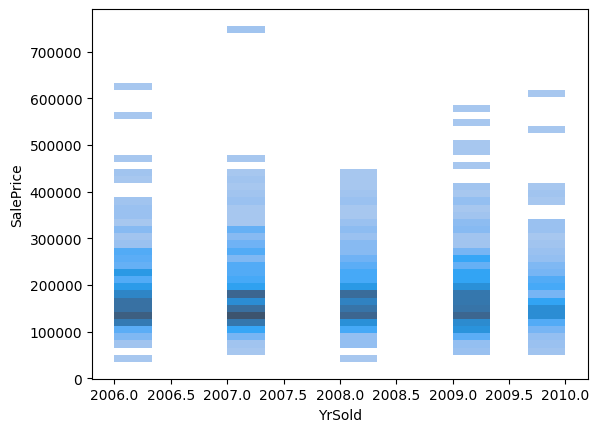

In [512]:
sns.histplot(data=df, x='YrSold', y='SalePrice');

In [513]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

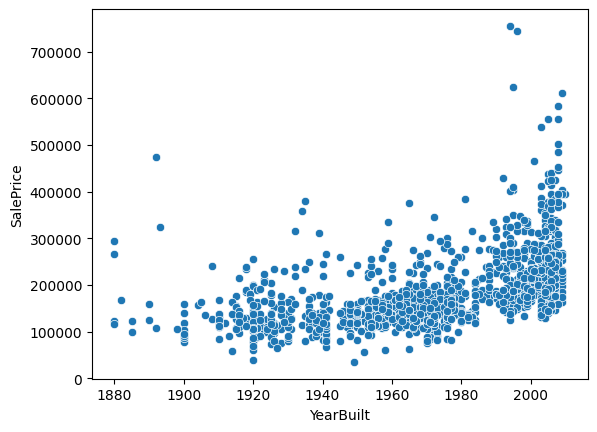

In [514]:
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice');

In [515]:
# just for fun
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,3.023916,70.630187,10706.294469,0.996263,1.903587,2.787743,0.000747,3.001495,0.063528,...,47.782511,21.263827,3.585949,16.43423,3.010463,6.331839,2007.805680,7.500000,3.804933,186761.782511
std,41.252576,0.624383,22.161578,10336.621126,0.061039,1.419114,0.687379,0.027338,1.630854,0.278365,...,65.362562,60.843964,30.224622,58.05159,41.961337,2.699437,1.330691,1.580666,1.059942,78913.847668
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,20.000000,3.000000,60.000000,7744.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,2007.000000,8.000000,4.000000,135000.000000
50%,50.000000,3.000000,70.049958,9600.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,28.000000,0.000000,0.000000,0.00000,0.000000,6.000000,2008.000000,8.000000,4.000000,168500.000000
75%,70.000000,3.000000,80.000000,11760.750000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,70.000000,0.000000,0.000000,0.00000,0.000000,8.000000,2009.000000,8.000000,4.000000,220000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,547.000000,552.000000,508.000000,480.00000,738.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


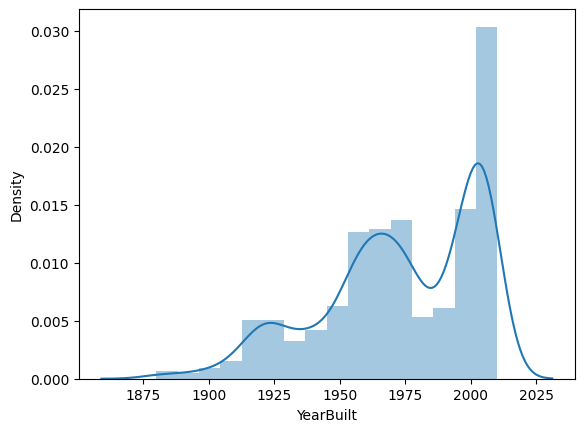

In [516]:
sns.distplot(df['YearBuilt']);

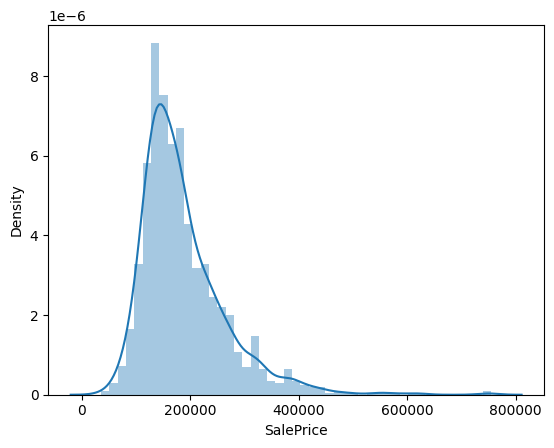

In [517]:
sns.distplot(df['SalePrice']);

In [518]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

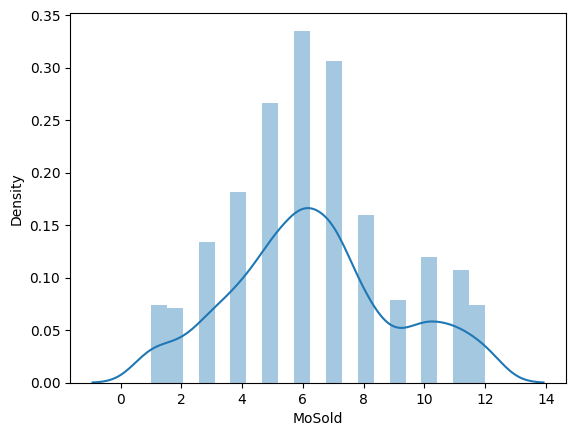

In [519]:
sns.distplot(df['MoSold']);

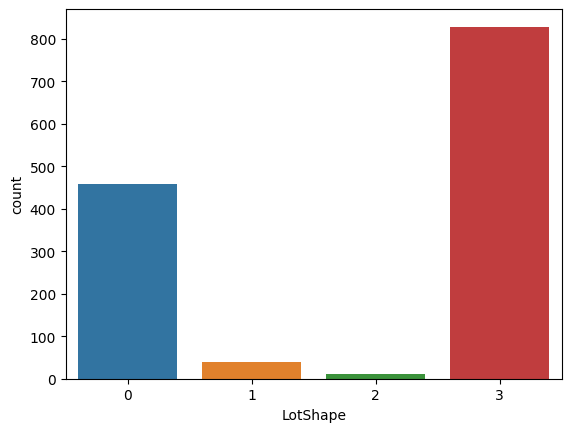

In [520]:
sns.countplot(data=df, x='LotShape');

In [521]:
# Fine... Enough

# **DATA PREPARATION**

<img src='https://www.geogebra.org/resource/gAqjNBmk/Fv8IxTCMYKOXacZY/material-gAqjNBmk.png' width=33%>

In [522]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [523]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [524]:
scaler = MinMaxScaler((0, 1))

In [525]:
X = scaler.fit_transform(X)

In [526]:
X.max()

1.0

In [527]:
X, y = shuffle(X, y)

In [528]:
from sklearn.model_selection import train_test_split

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [530]:
print(f'{X_train.shape} --- {y_train.shape}')
print('='*60)
print(f'{X_test.shape} --- {y_test.shape}')

(1003, 74) --- (1003,)
(335, 74) --- (335,)


# **MODEL BUILDING**
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4Zb7CLmvcOsnwHdbguJj13xAHZJxmVW6y-w&usqp=CAU'>

In [531]:
from tensorflow import keras
from tensorflow.keras import layers

In [532]:
model = keras.Sequential([
      layers.Dense(10, input_dim=X_train.shape[1], activation='relu'),
      layers.Dense(30, activation='relu'),
      layers.Dense(40, activation='relu'),
      layers.Dense(1)
  ])

model.compile(
    loss='msle',
    optimizer=keras.optimizers.Adam(0.001)
    )

In [533]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=32,
    shuffle=True,
    epochs=512,
    verbose=2
)

Epoch 1/512
29/29 - 1s - loss: 129.5311 - val_loss: 115.2534 - 1s/epoch - 39ms/step
Epoch 2/512
29/29 - 0s - loss: 103.4031 - val_loss: 92.0545 - 102ms/epoch - 4ms/step
Epoch 3/512
29/29 - 0s - loss: 84.0335 - val_loss: 76.7568 - 97ms/epoch - 3ms/step
Epoch 4/512
29/29 - 0s - loss: 71.3327 - val_loss: 66.3537 - 83ms/epoch - 3ms/step
Epoch 5/512
29/29 - 0s - loss: 61.9499 - val_loss: 57.7397 - 93ms/epoch - 3ms/step
Epoch 6/512
29/29 - 0s - loss: 54.0255 - val_loss: 50.6241 - 95ms/epoch - 3ms/step
Epoch 7/512
29/29 - 0s - loss: 47.6639 - val_loss: 45.0284 - 84ms/epoch - 3ms/step
Epoch 8/512
29/29 - 0s - loss: 42.6054 - val_loss: 40.4478 - 82ms/epoch - 3ms/step
Epoch 9/512
29/29 - 0s - loss: 38.3708 - val_loss: 36.5680 - 102ms/epoch - 4ms/step
Epoch 10/512
29/29 - 0s - loss: 34.8072 - val_loss: 33.3201 - 86ms/epoch - 3ms/step
Epoch 11/512
29/29 - 0s - loss: 31.8218 - val_loss: 30.5930 - 93ms/epoch - 3ms/step
Epoch 12/512
29/29 - 0s - loss: 29.3013 - val_loss: 28.2741 - 93ms/epoch - 3ms/st

In [535]:
h_df = pd.DataFrame(hist.history)
h_df['val_loss'].min()

0.0215790793299675

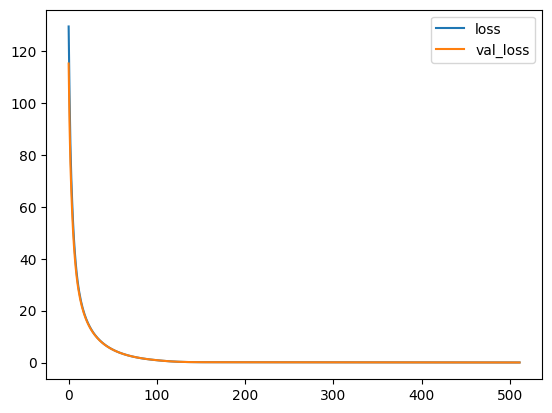

In [538]:
h_df.loc[:, ['loss', 'val_loss']].plot();

In [539]:
pred = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [541]:
pred[0]

array([236496.33], dtype=float32)

In [544]:
y_test[22]

230000

In [ ]:
# close? Close. It's fine

<img src='https://media.tenor.com/P8VsDwHZreYAAAAM/tobey-maguire-spider-man.gif'><br>
<img src='https://media.tenor.com/nogVc6m0iYUAAAAC/american-psycho-christian-bale.gif' width=35%><br>
<img src='https://media0.giphy.com/media/LiljwvntZmf4c/200w.gif?cid=6c09b952segp6wm0jwzbqhj4v1bg2ygmeunij28yn65pnnvq&ep=v1_gifs_search&rid=200w.gif&ct=g'><br>
<img src='https://www.icegif.com/wp-content/uploads/2022/09/icegif-1546.gif' width=50%><br>
<img src='https://media.tenor.com/Aif4mJlndPAAAAAd/freddy-fazbear-five-nights-at-freddys.gif' width=33%>